KPI Client : (89, 6)
KPI Employé : (9, 7)
KPI Mois : (23, 3)

Aperçu des KPI Client :


,CustomerID,Delivered,Pending,CompanyName,City,Country
0,ALFKI,6,0,Alfreds Futterkiste,Berlin,Germany
1,ANATR,4,0,Ana Trujillo Emparedados y helados,M xico D.F.,Mexico
2,ANTON,7,0,Antonio Moreno Taquer a,M xico D.F.,Mexico
3,AROUT,13,0,Around the Horn,London,UK
4,BERGS,18,0,Berglunds snabbk p,Lule,Sweden



Aperçu des KPI Employé :


,EmployeeID,Delivered,Pending,FirstName,LastName,City,Country
0,1,120,3,Nancy,Davolio,Seattle,USA
1,2,93,3,Andrew,Fuller,Tacoma,USA
2,3,127,0,Janet,Leverling,Kirkland,USA
3,4,151,5,Margaret,Peacock,Redmond,USA
4,5,42,0,Steven,Buchanan,London,UK



Aperçu des KPI Mois :


,MonthYear,Delivered,Pending
0,1996-07,22,0
1,1996-08,25,0
2,1996-09,23,0
3,1996-10,26,0
4,1996-11,25,0



Affichage des graphiques existants :


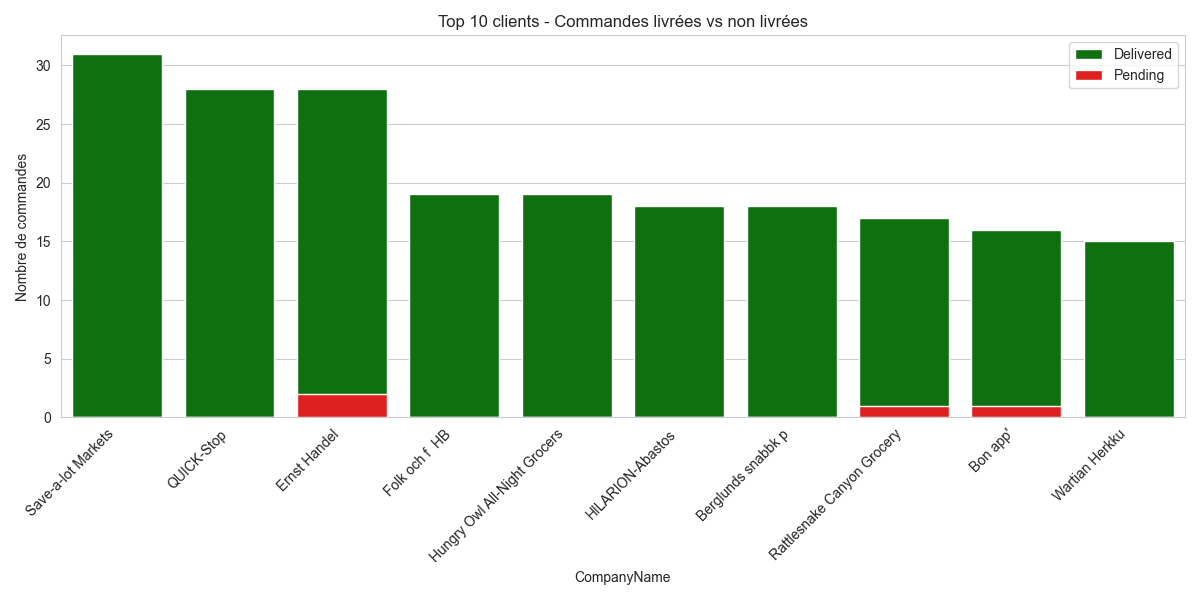

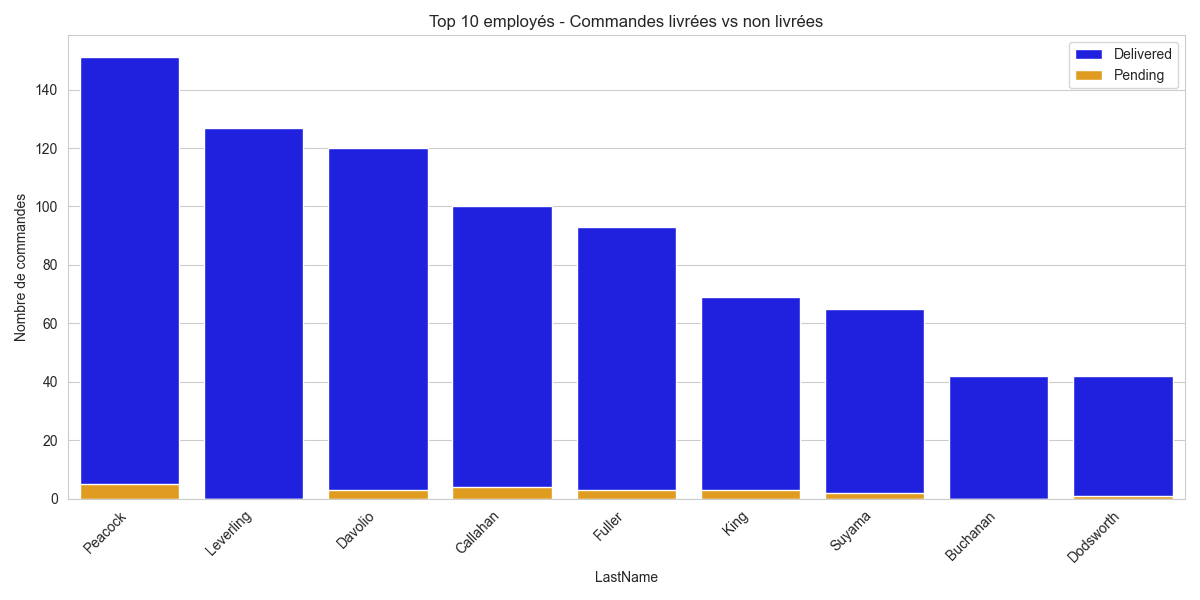

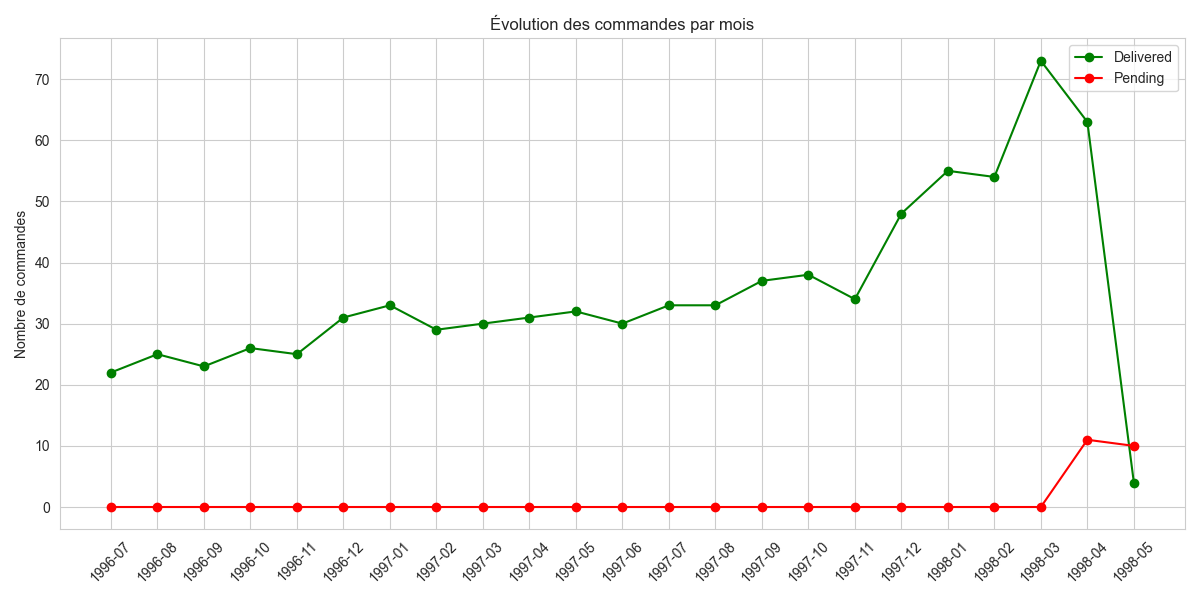


Top 10 clients par commandes livrées :


,CompanyName,Delivered,Pending
68,Save-a-lot Markets,31,0
60,QUICK-Stop,28,0
19,Ernst Handel,28,2
22,Folk och f HB,19,0
35,Hungry Owl All-Night Grocers,19,0
33,HILARION-Abastos,18,0
4,Berglunds snabbk p,18,0
62,Rattlesnake Canyon Grocery,17,1
8,Bon app',16,1
84,Wartian Herkku,15,0



Top 10 employés par commandes livrées :


,FirstName,LastName,Delivered,Pending
3,Margaret,Peacock,151,5
2,Janet,Leverling,127,0
0,Nancy,Davolio,120,3
7,Laura,Callahan,100,4
1,Andrew,Fuller,93,3
6,Robert,King,69,3
5,Michael,Suyama,65,2
4,Steven,Buchanan,42,0
8,Anne,Dodsworth,42,1



Mois les plus productifs :


,MonthYear,Delivered,Pending
20,1998-03,73,0
21,1998-04,63,11
18,1998-01,55,0
19,1998-02,54,0
17,1997-12,48,0



--- Conclusion analytique ---
✔ Les clients les plus performants (livrés) : Save-a-lot Markets, QUICK-Stop, Ernst Handel, Folk och f  HB, Hungry Owl All-Night Grocers, HILARION-Abastos, Berglunds snabbk p, Rattlesnake Canyon Grocery, Bon app', Wartian Herkku
✔ Les employés les plus performants (livrés) : Margaret Peacock, Janet Leverling, Nancy Davolio, Laura Callahan, Andrew Fuller, Robert King, Michael Suyama, Steven Buchanan, Anne Dodsworth
✔ Les mois avec le plus de commandes livrées : 1998-03, 1998-04, 1998-01, 1998-02, 1997-12

Le notebook est prêt pour être inclus dans le rapport PDF.


In [5]:
# analysis.ipynb
# Notebook d'analyse des données Northwind
# Étape E du projet BI
# Version complète - utilise les fichiers et graphiques générés à l'étape D

# ------------------------------
# Import des bibliothèques nécessaires
# ------------------------------
import pandas as pd
from IPython.display import Image, display
import os

# ------------------------------
# Création des chemins
# ------------------------------
data_path = "../data/processed/"
figures_path = "../figures/"

# ------------------------------
# Section 1 : Chargement des données KPI
# ------------------------------
try:
    kpi_client = pd.read_csv(os.path.join(data_path, "kpi_client.csv"))
    kpi_employee = pd.read_csv(os.path.join(data_path, "kpi_employee.csv"))
    kpi_month = pd.read_csv(os.path.join(data_path, "kpi_month.csv"))
except FileNotFoundError as e:
    print("Erreur : Fichier KPI non trouvé ! Vérifie que compute_kpi_full.py a été exécuté.")
    raise e

print("KPI Client :", kpi_client.shape)
print("KPI Employé :", kpi_employee.shape)
print("KPI Mois :", kpi_month.shape)

# ------------------------------
# Section 2 : Vérification qualité
# ------------------------------
print("\nAperçu des KPI Client :")
display(kpi_client.head())

print("\nAperçu des KPI Employé :")
display(kpi_employee.head())

print("\nAperçu des KPI Mois :")
display(kpi_month.head())

# ------------------------------
# Section 3 : Affichage des graphiques générés
# ------------------------------
print("\nAffichage des graphiques existants :")

for fig_file in ["kpi_client.png", "kpi_employee.png", "kpi_month.png"]:
    path = os.path.join(figures_path, fig_file)
    if os.path.exists(path):
        display(Image(path))
    else:
        print(f"Graphique non trouvé : {path}")

# ------------------------------
# Section 4 : Analyse et conclusions
# ------------------------------

# Top clients par commandes livrées
top_clients = kpi_client.sort_values('Delivered', ascending=False).head(10)
print("\nTop 10 clients par commandes livrées :")
display(top_clients[['CompanyName','Delivered','Pending']])

# Top employés par commandes livrées
top_employees = kpi_employee.sort_values('Delivered', ascending=False).head(10)
print("\nTop 10 employés par commandes livrées :")
display(top_employees[['FirstName','LastName','Delivered','Pending']])

# Mois les plus productifs
top_months = kpi_month.sort_values('Delivered', ascending=False).head(5)
print("\nMois les plus productifs :")
display(top_months)

# ------------------------------
# Section 5 : Conclusion analytique générale
# ------------------------------
print("\n--- Conclusion analytique ---")
print(f"✔ Les clients les plus performants (livrés) : {', '.join(top_clients['CompanyName'].tolist())}")
print(f"✔ Les employés les plus performants (livrés) : {', '.join(top_employees['FirstName'] + ' ' + top_employees['LastName'])}")
print(f"✔ Les mois avec le plus de commandes livrées : {', '.join(top_months['MonthYear'].astype(str))}")

print("\nLe notebook est prêt pour être inclus dans le rapport PDF.")
